In [1]:
import pandas as pd
import pickle
from transformers import BertTokenizer
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import numpy as np

In [2]:
data_path = 'D:\\Data\\text_summarization\\'

In [6]:
with open(data_path + "hvg_tokenized.pkl", 'rb') as f:
    contents, summaries = pickle.load(f)

In [7]:
print("Number of articles:", len(contents))

Number of articles: 375736


In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
print("Vocabulary size:", tokenizer.vocab_size)

Vocabulary size: 119547


In [9]:
tokens = [token for tokenized_text_ids in [*contents, *summaries] for token in tokenized_text_ids]
print("Number of tokens in corpus:", len(tokens))

Number of tokens in corpus: 134258814


In [10]:
counter = Counter(tokens)
print(f"Used tokens: {len(counter.keys())}/{tokenizer.vocab_size} = {len(counter.keys())/tokenizer.vocab_size * 100:.2f}%")

Used tokens: 39342/119547 = 32.91%


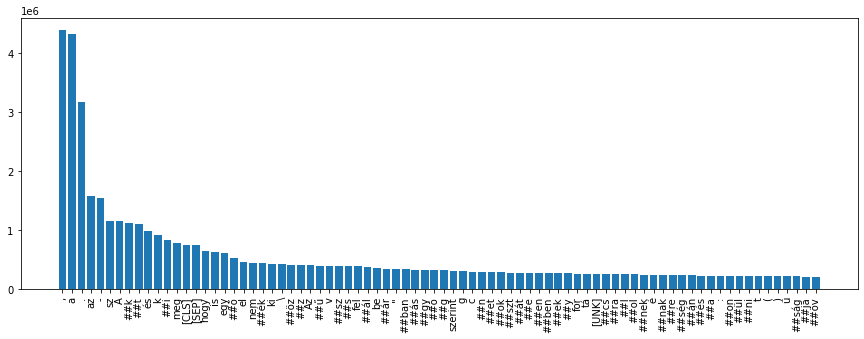

In [11]:
ms = counter.most_common()[:80]

plt.figure(figsize=(15,5))
plt.bar([tokenizer.convert_ids_to_tokens([id])[0] for id, count in ms], [count for id, count in ms]);
plt.xticks(rotation=90)
plt.show()

In [12]:
special_tokens = set([0, 100, 101, 102, 103, 104, 105])
token_ids = list(set(counter.keys()).union(special_tokens))

In [15]:
with open(data_path + "used_token_ids.pkl", 'wb') as f:
    pickle.dump(token_ids, f)

# Used token frequency

In [16]:
with open(data_path + "used_token_ids.pkl", 'rb') as f:
    token_ids = pickle.load(f)

In [17]:
with open(data_path + "hvg_tokenized_shrink_4000.pkl", 'rb') as f:
    contents, summaries = pickle.load(f)

In [54]:
tokens = [t for s in summaries for t in s]

In [55]:
counter = Counter(tokens)

In [59]:
counter.most_common()

[(1, 965137),
 (61, 665555),
 (19, 545590),
 (17, 501827),
 (2, 375736),
 (3, 375736),
 (18, 264543),
 (259, 242795),
 (2879, 176305),
 (116, 173992),
 (152, 163808),
 (112, 153175),
 (71, 152178),
 (36, 142121),
 (205, 128528),
 (676, 113056),
 (487, 109817),
 (735, 100084),
 (2063, 84475),
 (117, 73091),
 (233, 68037),
 (118, 67817),
 (408, 64523),
 (532, 62695),
 (103, 62485),
 (1124, 62467),
 (942, 61023),
 (919, 59903),
 (1168, 59012),
 (1181, 58527),
 (293, 57982),
 (929, 57359),
 (425, 56940),
 (80, 56780),
 (111, 56778),
 (63, 56710),
 (799, 55178),
 (579, 53804),
 (254, 53619),
 (458, 52597),
 (67, 50349),
 (2777, 50222),
 (706, 49822),
 (193, 48758),
 (473, 48607),
 (333, 46740),
 (1428, 44892),
 (137, 44541),
 (430, 43250),
 (141, 43186),
 (108, 42931),
 (650, 42620),
 (124, 42583),
 (832, 42428),
 (53, 41929),
 (433, 41602),
 (1336, 40991),
 (236, 40568),
 (1053, 39772),
 (464, 39596),
 (1081, 39216),
 (363, 39206),
 (127, 38205),
 (3445, 37818),
 (1859, 37761),
 (109, 3775

In [115]:
counts = []
total = 0
for i in range(4000):
    count = counter[i]
    counts.append(count)
    total += count

counts = np.array(counts) / total

In [116]:
counts = (counts / counts.mean())

In [117]:
counts[counts == 0] = 1

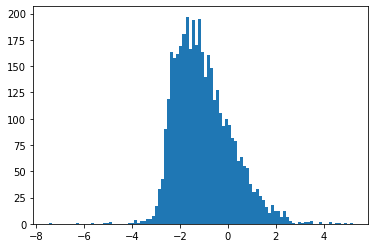

In [118]:
plt.hist(np.log(counts), bins=100);

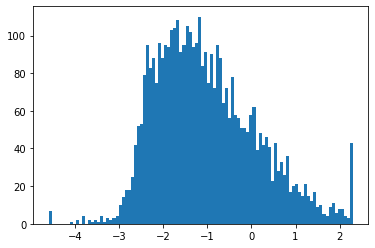

In [120]:
counts = np.clip(counts, 1e-2, 10)
plt.hist(np.log(counts), bins=100);

In [121]:
with open(data_path + "token_weights_4000.pkl", 'wb') as f:
    pickle.dump(counts, f)